<a href="https://www.kaggle.com/code/mohammadhaqbani/calculate-merit-increase-for-acn?scriptVersionId=135498051" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Analyzing the Distribution of Merit Across Different Employee Grades

We dive into an insightful analysis of employee compensation, focusing on merit increases. Our primary data consists of employee information, including their grade, performance rating, and annual basic salary. One of the key factors we investigate is the impact of an employee's grade and performance on their merit increase rate. By analyzing the spread of annual basic salaries across different grades, calculating the compa-ratios, and further determining the merit increase rate, we gain a comprehensive understanding of the organization's compensation strategy.

Additionally, we also explore the overall distribution of merit increases, focusing on their normality, and the correlation between the numeric grade and payout. Our analysis culminates in a detailed representation of payouts across all grades, thus providing valuable insights into the efficiency and effectiveness of the organization's pay structure.

The knowledge gleaned from this analysis is critical in ensuring a fair and motivating compensation strategy, thereby contributing to employee satisfaction and organizational success.

## Data overview

the data we are working on has been provided by the compnay includes the below columes:

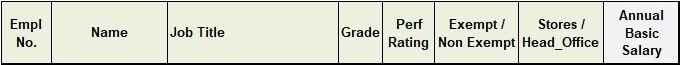


## Merit Increase Matrix

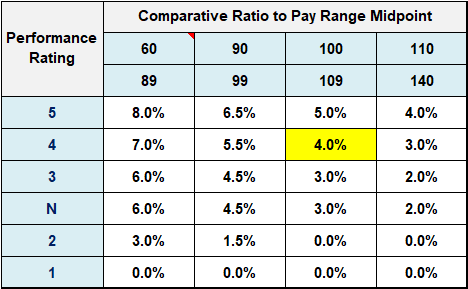

## High-level data analysis

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

df = pd.read_csv('/kaggle/input/calculate-merit-increase-for-company-acn/sample_data_to_anlayize_calculate_comppo_ratio_v.1.csv')
df.head()
df.describe()

,empl_no,perf_rating,annual_basic_salary
count,50.000000,50.000000,50.000000
mean,1984.980000,2.980000,57179.600000
std,998.312832,1.115567,25076.051911
min,1023.000000,0.000000,21120.000000
25%,1035.250000,3.000000,42070.000000
50%,1047.500000,3.000000,51100.000000
75%,3012.750000,3.750000,66430.000000
max,3026.000000,5.000000,162000.000000


**Perf_rating:**

* Mean: The average performance rating is approximately 2.98.
* Std: The standard deviation is approximately 1.12, indicating the variation in the performance ratings from the mean.
* Min: The lowest performance rating is 0.
* 25%: 25% of the performance ratings are below 3.
* 50%: The median performance rating is 3.
* 75%: 75% of the performance ratings are below 3.75.
* Max: The highest performance rating is 5.

**Annual_basic_salary**

* Mean: The average annual basic salary is approximately 57179.6.
* Std: The standard deviation is approximately 25076.05, indicating the dispersion of the salaries from the mean.
* Min: The lowest annual basic salary is 21120.
* 25%: 25% of the employees earn less than 42070 per annum.
* 50%: The median salary is 51100, meaning that 50% of the employees earn less than this amount and 50% earn more.
* 75%: 75% of the employees earn less than 66430 per annum.
* Max: The highest annual basic salary is 162000.

In [2]:
# Unique values in the 'job_title' column
df['job_title'].unique()

array(['cleaner', 'messenger', 'office assistant', 'receiving manager',
       'receptionist', 'admin clerk', 'butchery supervisor', 'cashier',
       'senior receiving mgr', 'hr assistant', 'accts receivable clerk',
       'buying clerk', 'secretary', 'manager-perishables',
       'manager-fruit&veg', 'manager bakery', 'manager-bakery',
       'manager frontline', 'floor manager', 'cash office supervisor',
       'co-ordinator-deli', 'senior accts payable clerk', 'hr specialist',
       'eb administrator', 'department head', 'supervisor',
       'executive personal assistant', 'buyer', 'assistant store manager',
       'operations manager', 'snr food technologist', 'admin manager',
       'store manager', 'financial accountant', 'senior buyer',
       'marketing manager', 'hr manager', 'regional manager',
       'general manager'], dtype=object)

In [3]:
# Average 'annual_basic_salary' grouped by 'job_title'
df.groupby('job_title')['annual_basic_salary'].mean()

job_title
accts receivable clerk           43600.0
admin clerk                      34790.0
admin manager                    77340.0
assistant store manager          56755.0
butchery supervisor              42985.0
buyer                            74480.0
buying clerk                     42640.0
cash office supervisor           51890.0
cashier                          31200.0
cleaner                          21120.0
co-ordinator-deli                53385.0
department head                  57940.0
eb administrator                 60310.0
executive personal assistant     60910.0
financial accountant             87360.0
floor manager                    50820.0
general manager                 162000.0
hr assistant                     37700.0
hr manager                       88440.0
hr specialist                    58880.0
manager bakery                   47390.0
manager frontline                50125.0
manager-bakery                   48520.0
manager-fruit&veg                44505.0
manage

In [4]:
# Visualization of 'perf_rating' across different 'grade'
import seaborn as sns
import matplotlib.pyplot as plt

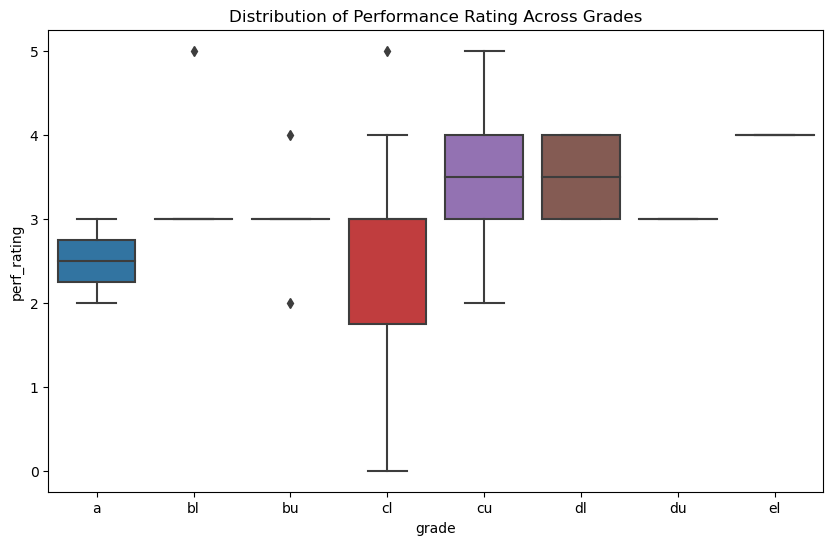

In [5]:
plt.figure(figsize=(10,6))
sns.boxplot(x='grade', y='perf_rating', data=df)
plt.title('Distribution of Performance Rating Across Grades')
plt.show()

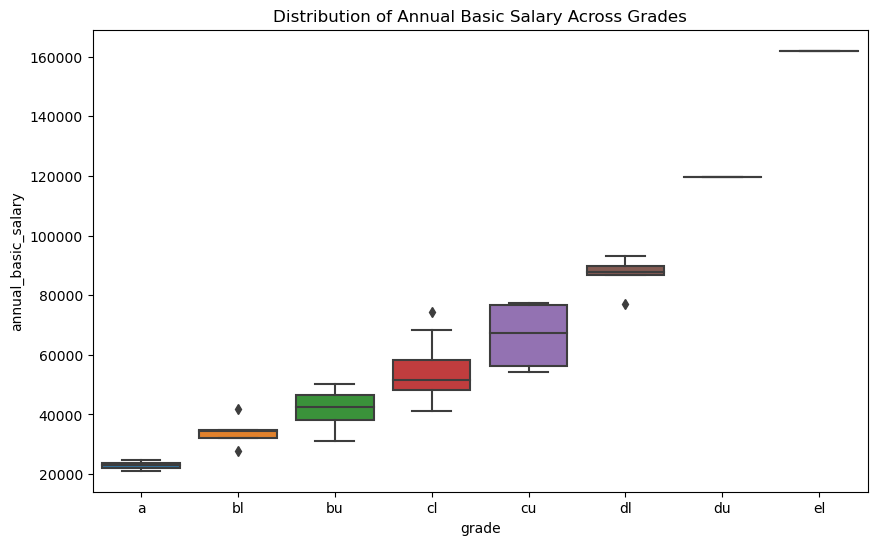

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(x='grade', y='annual_basic_salary', data=df)
plt.title('Distribution of Annual Basic Salary Across Grades')
plt.show()

## Perforamnce scores from Qualitative to Quantitative

I have mapped the grades to numeric values using a dictionary for easy results and calculation.

In [7]:
# Create a dictionary to map grades to numbers
grade_mapping = {
    'a': 1,
    'bl': 2,
    'bu': 3,
    'cl': 4,
    'cu': 5,
    'dl': 6,
    'du': 7,
    'el': 8
}

# Create a new column 'numeric_grade' in the DataFrame
df['numeric_grade'] = df['grade'].map(grade_mapping)

# Verify the changes
df.head()

,empl_no,name,job_title,grade,perf_rating,stores_or_head_office,annual_basic_salary,numeric_grade
0,1046,margaret lawrence,cleaner,a,2,stores,21120,1
1,1029,thomas gamble,messenger,a,3,head_office,24780,1
2,1041,tanya boyes,office assistant,bl,3,head_office,27830,2
3,3012,sean comely,receiving manager,bl,3,stores,41940,2
4,3016,michael gouws,receiving manager,bl,5,stores,32170,2


## Calculating the compo-ratio

The median is previously defined for each grade as follows:

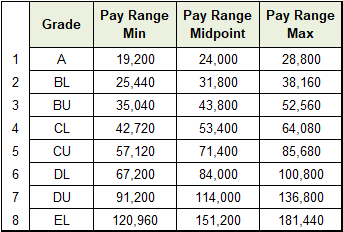

In [8]:
# Create a dictionary to map numeric_grade to Pay Range Midpoint
midpoint_mapping = {
    1: 24000,
    2: 31800,
    3: 43800,
    4: 53400,
    5: 71400,
    6: 84000,
    7: 114000,
    8: 151200
}

# Create a new column 'med_range' in the DataFrame
df['med_range'] = df['numeric_grade'].map(midpoint_mapping)

# Verify the changes
df.head()

,empl_no,name,job_title,grade,perf_rating,stores_or_head_office,annual_basic_salary,numeric_grade,med_range
0,1046,margaret lawrence,cleaner,a,2,stores,21120,1,24000
1,1029,thomas gamble,messenger,a,3,head_office,24780,1,24000
2,1041,tanya boyes,office assistant,bl,3,head_office,27830,2,31800
3,3012,sean comely,receiving manager,bl,3,stores,41940,2,31800
4,3016,michael gouws,receiving manager,bl,5,stores,32170,2,31800


In [9]:
# Calculate Compa-Ratio and store it in a new column
df['compo_ratio'] = (df['annual_basic_salary'] / df['med_range']) * 100

# Verify the changes
df.head()

,empl_no,name,job_title,grade,perf_rating,stores_or_head_office,annual_basic_salary,numeric_grade,med_range,compo_ratio
0,1046,margaret lawrence,cleaner,a,2,stores,21120,1,24000,88.000000
1,1029,thomas gamble,messenger,a,3,head_office,24780,1,24000,103.250000
2,1041,tanya boyes,office assistant,bl,3,head_office,27830,2,31800,87.515723
3,3012,sean comely,receiving manager,bl,3,stores,41940,2,31800,131.886792
4,3016,michael gouws,receiving manager,bl,5,stores,32170,2,31800,101.163522


In [10]:
# Calculate the median Compa-Ratio for each grade and each performance rating
median_compo_ratio = df.groupby(['numeric_grade', 'perf_rating'])['compo_ratio'].median()

# Print the results
print(median_compo_ratio)

numeric_grade  perf_rating
1              2               88.000000
               3              103.250000
2              3              108.757862
               5              101.163522
3              2               71.232877
               3               97.351598
               4              114.429224
4              0               77.940075
               1              100.056180
               2               95.692884
               3               96.029963
               4               96.928839
               5              114.063670
5              2               77.871148
               3               91.722689
               4              107.717087
               5               81.106443
6              3              103.142857
               4              105.285714
7              3              105.000000
8              4              107.142857
Name: compo_ratio, dtype: float64


## Mathcing merit metrix table to preforamnce and comp-ration

In [11]:
def calculate_bonus(perf_rating, compo_ratio):
    if perf_rating == 5:
        if 60 <= compo_ratio < 90:
            return 0.08
        elif 90 <= compo_ratio < 100:
            return 0.065
        elif 100 <= compo_ratio < 110:
            return 0.05
        elif 110 <= compo_ratio <= 140:
            return 0.04
    elif perf_rating == 4:
        if 60 <= compo_ratio < 90:
            return 0.07
        elif 90 <= compo_ratio < 100:
            return 0.055
        elif 100 <= compo_ratio < 110:
            return 0.04
        elif 110 <= compo_ratio <= 140:
            return 0.03
    elif perf_rating in [3, 0]:
        if 60 <= compo_ratio < 90:
            return 0.06
        elif 90 <= compo_ratio < 100:
            return 0.045
        elif 100 <= compo_ratio < 110:
            return 0.03
        elif 110 <= compo_ratio <= 140:
            return 0.02
    elif perf_rating == 2:
        if 60 <= compo_ratio < 100:
            return 0.03
        elif 100 <= compo_ratio <= 140:
            return 0
    elif perf_rating == 1:
        return 0
    else:
        return None

# Create a new 'bonus_rate' column in the DataFrame
df['merit_inc_rate'] = df.apply(lambda row: calculate_bonus(row['perf_rating'], row['compo_ratio']), axis=1)

# Verify the changes
df.head()

,empl_no,name,job_title,grade,perf_rating,stores_or_head_office,annual_basic_salary,numeric_grade,med_range,compo_ratio,merit_inc_rate
0,1046,margaret lawrence,cleaner,a,2,stores,21120,1,24000,88.000000,0.03
1,1029,thomas gamble,messenger,a,3,head_office,24780,1,24000,103.250000,0.03
2,1041,tanya boyes,office assistant,bl,3,head_office,27830,2,31800,87.515723,0.06
3,3012,sean comely,receiving manager,bl,3,stores,41940,2,31800,131.886792,0.02
4,3016,michael gouws,receiving manager,bl,5,stores,32170,2,31800,101.163522,0.05


In [12]:
# Convert 'merit_inc_rate' to percentage
df['merit_inc_rate'] = df['merit_inc_rate'] * 100

# Verify the changes
df.head()

,empl_no,name,job_title,grade,perf_rating,stores_or_head_office,annual_basic_salary,numeric_grade,med_range,compo_ratio,merit_inc_rate
0,1046,margaret lawrence,cleaner,a,2,stores,21120,1,24000,88.000000,3.0
1,1029,thomas gamble,messenger,a,3,head_office,24780,1,24000,103.250000,3.0
2,1041,tanya boyes,office assistant,bl,3,head_office,27830,2,31800,87.515723,6.0
3,3012,sean comely,receiving manager,bl,3,stores,41940,2,31800,131.886792,2.0
4,3016,michael gouws,receiving manager,bl,5,stores,32170,2,31800,101.163522,5.0


In [13]:
# Create a new 'pay_out' column
df['pay_out'] = (df['merit_inc_rate'] / 100) * df['annual_basic_salary']

# Verify the changes
df.head()

,empl_no,name,job_title,grade,perf_rating,stores_or_head_office,annual_basic_salary,numeric_grade,med_range,compo_ratio,merit_inc_rate,pay_out
0,1046,margaret lawrence,cleaner,a,2,stores,21120,1,24000,88.000000,3.0,633.6
1,1029,thomas gamble,messenger,a,3,head_office,24780,1,24000,103.250000,3.0,743.4
2,1041,tanya boyes,office assistant,bl,3,head_office,27830,2,31800,87.515723,6.0,1669.8
3,3012,sean comely,receiving manager,bl,3,stores,41940,2,31800,131.886792,2.0,838.8
4,3016,michael gouws,receiving manager,bl,5,stores,32170,2,31800,101.163522,5.0,1608.5


In [14]:
avg_payout = df.groupby('numeric_grade')['pay_out'].mean()
print(avg_payout)

numeric_grade
1     688.500000
2    1238.440000
3    1781.966667
4    1974.355000
5    3001.500000
6    3100.700000
7    3591.000000
8    6480.000000
Name: pay_out, dtype: float64


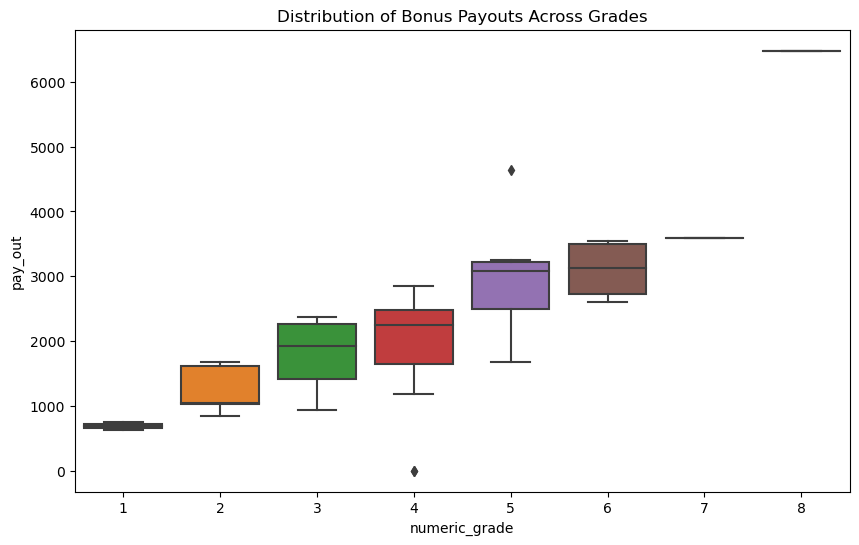

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='numeric_grade', y='pay_out', data=df)
plt.title('Distribution of Bonus Payouts Across Grades')
plt.show()

In [16]:
# Calculate the total sum of the 'pay_out' column
total_payout = df['pay_out'].sum()

# Print the total payout
print(f'mert_pay_out: {total_payout}')

mert_pay_out: 109778.19999999998


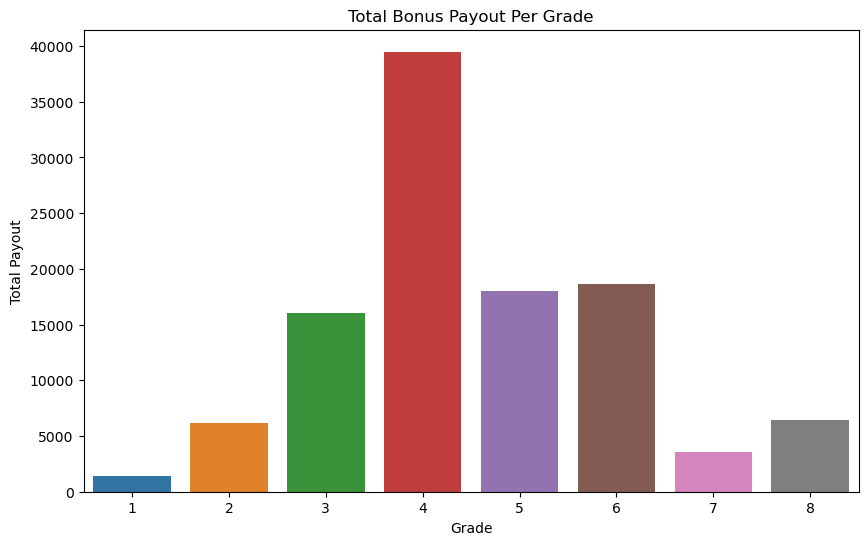

In [17]:
# Calculate the total payout for each grade
total_payout_per_grade = df.groupby('numeric_grade')['pay_out'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=total_payout_per_grade.index, y=total_payout_per_grade.values)
plt.title('Total Bonus Payout Per Grade')
plt.xlabel('Grade')
plt.ylabel('Total Payout')
plt.show()

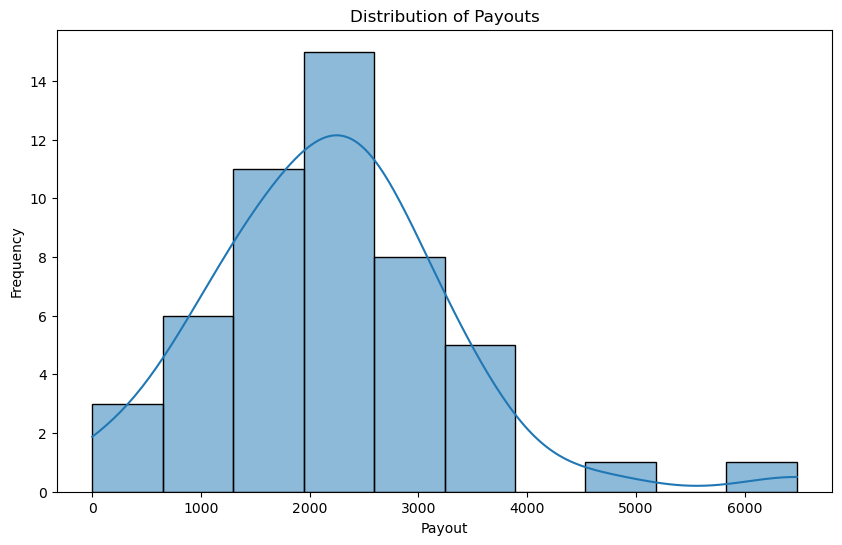

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['pay_out'], kde=True)
plt.title('Distribution of Payouts')
plt.xlabel('Payout')
plt.ylabel('Frequency')
plt.show()

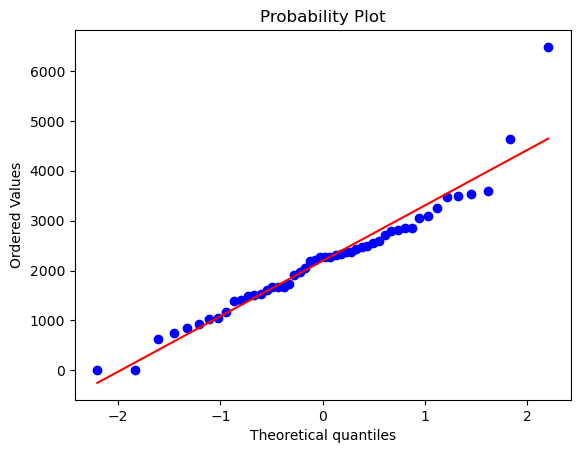

In [19]:
import scipy.stats as stats

stats.probplot(df['pay_out'], dist="norm", plot=plt)
plt.show()

In [20]:
fig = px.scatter(df, x='numeric_grade', y='pay_out')
fig.show()

## Adjusting the budget

ACN has requiested to make an assubption to limit the total payout budget to 50,000.
to accomdate this, to avhive thsi i must calculate the scaling factor and scaling factor to each payout.




In [21]:
# calculate the scaling factor
scaling_factor = 50000 / df['pay_out'].sum()

# apply the scaling factor to each payout
df['adjusted_pay_out'] = df['pay_out'] * scaling_factor

# check the total adjusted payout
print(df['adjusted_pay_out'].sum())

50000.000000000015


In [22]:
df.head()

,empl_no,name,job_title,grade,perf_rating,stores_or_head_office,annual_basic_salary,numeric_grade,med_range,compo_ratio,merit_inc_rate,pay_out,adjusted_pay_out
0,1046,margaret lawrence,cleaner,a,2,stores,21120,1,24000,88.000000,3.0,633.6,288.581886
1,1029,thomas gamble,messenger,a,3,head_office,24780,1,24000,103.250000,3.0,743.4,338.591815
2,1041,tanya boyes,office assistant,bl,3,head_office,27830,2,31800,87.515723,6.0,1669.8,760.533512
3,3012,sean comely,receiving manager,bl,3,stores,41940,2,31800,131.886792,2.0,838.8,382.043065
4,3016,michael gouws,receiving manager,bl,5,stores,32170,2,31800,101.163522,5.0,1608.5,732.613579


In [23]:
import plotly.graph_objects as go

grades = df['numeric_grade'].unique()

original_payouts = df.groupby('numeric_grade')['pay_out'].mean()
adjusted_payouts = df.groupby('numeric_grade')['adjusted_pay_out'].mean()

fig = go.Figure(data=[
    go.Bar(name='Original Payout', x=grades, y=original_payouts),
    go.Bar(name='Adjusted Payout', x=grades, y=adjusted_payouts)
])

# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [24]:
# Calculate the difference between the original and adjusted payout
df['pay_difference'] = df['pay_out'] - df['adjusted_pay_out']

# Calculate the average difference for each grade and round the results
average_difference = df.groupby('numeric_grade')['pay_difference'].mean().round()

# Print the result
print(average_difference)

numeric_grade
1     375.0
2     674.0
3     970.0
4    1075.0
5    1634.0
6    1688.0
7    1955.0
8    3529.0
Name: pay_difference, dtype: float64


In [25]:
# Calculate the total adjusted payout for each grade
total_adjusted_payout_per_grade = df.groupby('numeric_grade')['adjusted_pay_out'].sum()

# Calculate the percentage distribution
percentage_distribution = (total_adjusted_payout_per_grade / df['adjusted_pay_out'].sum()) * 100

# Print the result
print(percentage_distribution)


numeric_grade
1     1.254347
2     5.640646
3    14.609185
4    35.969892
5    16.404896
6    16.947081
7     3.271141
8     5.902811
Name: adjusted_pay_out, dtype: float64


In [26]:
# Define the budgets
budgets = [60000, 70000, 90000]

# Create an empty DataFrame to store the results
results_df = pd.DataFrame()

for budget in budgets:
    # Calculate the scaling factor for the current budget
    scaling_factor = budget / df['pay_out'].sum()

    # Apply the scaling factor to each payout
    df[f'adjusted_pay_out_{budget}'] = df['pay_out'] * scaling_factor

    # Calculate the total adjusted payout for each grade
    total_adjusted_payout_per_grade = df.groupby('numeric_grade')[f'adjusted_pay_out_{budget}'].sum()

    # Store the results in the DataFrame
    results_df[f'Total_Adjusted_Payout_{budget}'] = total_adjusted_payout_per_grade

# Print the results
print(results_df)


               Total_Adjusted_Payout_60000  Total_Adjusted_Payout_70000  \
numeric_grade                                                             
1                               752.608441                   878.043182   
2                              3384.387793                  3948.452425   
3                              8765.510821                 10226.429291   
4                             21581.935211                 25178.924413   
5                              9842.937851                 11483.427493   
6                             10168.248341                 11862.956398   
7                              1962.684759                  2289.798885   
8                              3541.686783                  4131.967913   

               Total_Adjusted_Payout_90000  
numeric_grade                               
1                              1128.912662  
2                              5076.581689  
3                             13148.266231  
4                       